In [ ]:
#ANN

#[1] 패키지를 불러오기

from keras import layers   #각 계층을 만드는 모듈
from keras import models   #각 계층을 연결하여 신경망 모델을 만든 후, 컴파일하고 학습시키는 모듈
                           #compile(), fit(), predict(), evaluate() 등 딥러닝 처리 함수 대부분을 제공함
                           
#[2] 필요한 파라미터 설정
#후반의 main()에서 설정
#Nin 입력계층 노드 수, Nh 은닉계층 수, number_of_class 출력값이 가질 클래스 수, Nout 출력 노드 수

Using TensorFlow backend.


In [ ]:
#[3] 모델 구현
#신경망을 연쇄 방식 모델링을 포함하는 함수형 구현

def ANN_seq_func(Nin, Nh, Nout): 
  model = models.Sequential()
  model.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,)))
  model.add(layers.Dense(Nout, activation='softmax'))
  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  return model


In [ ]:
#[4] 데이터 불러오기
#Mnist 필기 숫자 데이터셋 

import numpy as np
from keras import datasets #mnist
from keras.utils import np_utils #to_categorical

def Data_func():
  (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

  #0~9의 숫자로 된 출력값을 이진수(0/1)로 표현되는 벡터로 바꿈 (더 효율적)
  Y_train = np_utils.to_categorical(y_train) 
  Y_test = np_utils.to_categorical(y_test)
  
  L, W, H = X_train.shape
  X_train = X_train.reshape(-1,W*H) #-1 행렬의 행을 자동으로 설정, 열수가 W*H로 지정
  X_test = X_test.reshape(-1, W*H)

  X_train = X_train/255.0   #정규화: 0~255로 되어있는 입력값을 0~1로 바꿔줌 (성능 최적화를 위함)
  X_test = X_test/255.0

  return (X_train, Y_train), (X_test, Y_test)

In [ ]:
#[5] 학습 결과 분석을 위한 그래프 구현
import matplotlib.pyplot as plt

def plot_acc(history, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)  #두 선의 이름(Train, Test) 표시    

def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history    
    plt.plot(history['loss'])          #학습 데이터로 구한 손실값
    plt.plot(history['val_loss'])      #검증 데이터로 구한 손실값
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)

11493376/11490434 [==============================] - 1s 0us/step
Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 2s 45us/step - loss: 0.3926 - accuracy: 0.8919 - val_loss: 0.2129 - val_accuracy: 0.9413
Epoch 2/15
48000/48000 [==============================] - 2s 40us/step - loss: 0.1862 - accuracy: 0.9466 - val_loss: 0.1551 - val_accuracy: 0.9574
Epoch 3/15
48000/48000 [==============================] - 2s 39us/step - loss: 0.1363 - accuracy: 0.9611 - val_loss: 0.1317 - val_accuracy: 0.9632
Epoch 4/15
48000/48000 [==============================] - 2s 38us/step - loss: 0.1085 - accuracy: 0.9689 - val_loss: 0.1187 - val_accuracy: 0.9662
Epoch 5/15
48000/48000 [==============================] - 2s 40us/step - loss: 0.0882 - accuracy: 0.9740 - val_loss: 0.1110 - val_accuracy: 0.9667
Epoch 6/15
48000/48000 [==============================] - 2s 40us/step - loss: 0.0728 - accuracy: 0.9794 - val_loss: 0.0967 - val_accuracy: 0.9716
Epo

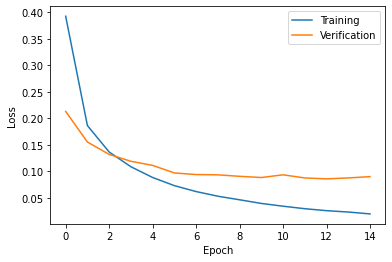

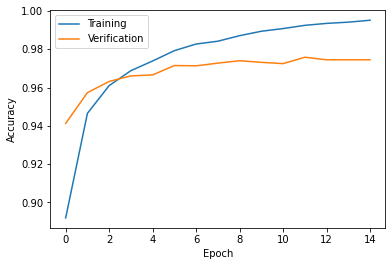

In [ ]:
#[6] 학습 및 성능 분석
def main():
  #파라미터 설정
  #Nin 입력계층 노드 수, Nh 은닉계층 수, number_of_class 출력값이 가질 클래스 수, Nout 출력 노드 수
  Nin = 784
  Nh = 100
  number_of_class = 10
  Nout = number_of_class

  #모델 설정
  model = ANN_seq_func(Nin, Nh, Nout)
  (X_train, Y_train), (X_test, Y_test) = Data_func()

  #학습하기
  history = model.fit(X_train,Y_train, epochs=15, batch_size=100, validation_split=0.2)
  performance_test = model.evaluate(X_test, Y_test, batch_size=100)
  print('Test Loss and Accuracy -->', performance_test)

  plot_loss(history)
  plt.show()
  plot_acc(history)
  plt.show()

#main() 코드 실행하기
if __name__ == '__main__':
  main()

In [ ]:
#DNN

#[1] 패키지를 불러오기
from keras import layers   #각 계층을 만드는 모듈
from keras import models   #각 계층을 연결하여 신경망 모델을 만든 후, 컴파일하고 학습시키는 모듈
                           #compile(), fit(), predict(), evaluate() 등 딥러닝 처리 함수 대부분을 제공함
 #[2] 필요한 파라미터 설정
Nin = 784
Nh_l = [100, 50]
number_of_class = 10
Nout = number_of_class
#[3] 모델 구현
class DNN(models.Sequential):
    def __init__(self, Nin, Nh_l, Nout):
        super().__init__()
        self.add(layers.Dense(Nh_l[0], activation='relu', input_shape=(Nin,), name='Hidden-1'))
        self.add(layers.Dense(Nh_l[1], activation='relu', name='Hidden-2'))       
        self.add(layers.Dense(Nout, activation='softmax'))
        self.compile(loss='categorical_crossentropy', 
                         optimizer='adam', 
                         metrics=['accuracy'])


In [ ]:
#[4] 데이터 불러오기
import numpy as np 
from keras import datasets              
from keras.utils import np_utils 
 
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
 
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
 
L, W, H = X_train.shape
X_train = X_train.reshape(-1, W * H)
X_test = X_test.reshape(-1, W * H)
 
X_train = X_train / 255.0
X_test = X_test / 255.0 

In [ ]:
#[5] 학습 결과 분석을 위한 그래프 구현

import matplotlib.pyplot as plt

def plot_acc(history, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)  #두 선의 이름(Train, Test) 표시    

def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history    
    plt.plot(history['loss'])          #학습 데이터로 구한 손실값
    plt.plot(history['val_loss'])      #검증 데이터로 구한 손실값
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 2s 38us/step - loss: 0.3745 - accuracy: 0.8908 - val_loss: 0.1813 - val_accuracy: 0.9482
Epoch 2/15
48000/48000 [==============================] - 2s 36us/step - loss: 0.1545 - accuracy: 0.9548 - val_loss: 0.1338 - val_accuracy: 0.9629
Epoch 3/15
48000/48000 [==============================] - 2s 37us/step - loss: 0.1089 - accuracy: 0.9683 - val_loss: 0.1253 - val_accuracy: 0.9630
Epoch 4/15
48000/48000 [==============================] - 2s 36us/step - loss: 0.0827 - accuracy: 0.9747 - val_loss: 0.1081 - val_accuracy: 0.9693
Epoch 5/15
48000/48000 [==============================] - 2s 36us/step - loss: 0.0671 - accuracy: 0.9804 - val_loss: 0.1058 - val_accuracy: 0.9693
Epoch 6/15
48000/48000 [==============================] - 2s 37us/step - loss: 0.0539 - accuracy: 0.9839 - val_loss: 0.1111 - val_accuracy: 0.9694
Epoch 7/15
48000/48000 [==============================] - 2s 37us/st

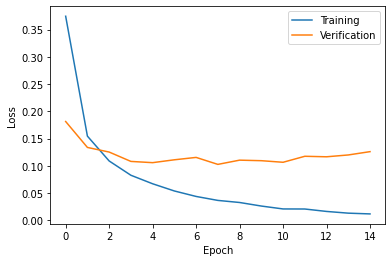

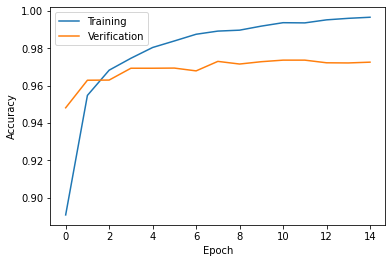

In [ ]:
#[6] 학습 및 테스트(성능 분석)
model = DNN(Nin, Nh_l, Nout)
history = model.fit(X_train, y_train, epochs=15, batch_size=100, validation_split=0.2)
performace_test = model.evaluate(X_test, y_test, batch_size=100)
print('Test Loss and Accuracy ->', performace_test)

plot_loss(history)
plt.show()
plot_acc(history)
plt.show()

In [ ]:
#CNN

#[1] 패키지를 불러오기
import keras
from keras import layers   #각 계층을 만드는 모듈
from keras import models   #각 계층을 연결하여 신경망 모델을 만든 후, 컴파일하고 학습시키는 모듈
                           #compile(), fit(), predict(), evaluate() 등 딥러닝 처리 함수 대부분을 제공함
from keras import backend  #딥러닝 엔진을 직접 제어할 수 있는 모듈 제공 
                           #(많은 기능을 제공하는 케라스 이용시 그리 많이 사용되지는 않음


#[2] 필요한 파라미터 설정
#후반의 main()에서 설정
#Nin 입력계층 노드 수, Nh 은닉계층 수, number_of_class 출력값이 가질 클래스 수, Nout 출력 노드 수

In [ ]:
#[3] 모델 구현
#models.Sequential로 상속하여 연쇄 방식으로 모델을 구현 가능함 
#C의 재귀함수처럼 자기자신 모델을 연쇄적으로 사용
class CNN(models.Sequential):
    def __init__(self, input_shape, num_classes):
        #super()는 기본 특성을 상속한 부모 함수임, 이 부모 객체의 초기화 함수를 먼저 부름
        super().__init__()  

        self.add(layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
        self.add(layers.Conv2D(64, (3, 3), activation='relu'))
        self.add(layers.MaxPooling2D(pool_size=(2, 2)))
        self.add(layers.Dropout(0.25))
        self.add(layers.Flatten())
        self.add(layers.Dense(128, activation='relu'))
        self.add(layers.Dropout(0.5))
        self.add(layers.Dense(num_classes, activation='softmax'))

        self.compile(loss=keras.losses.categorical_crossentropy,
                      optimizer='rmsprop',
                      metrics=['accuracy'])

In [ ]:
#[4] 데이터 불러오기
#Mnist 필기 숫자 데이터셋 
from keras import datasets 

class DATA():
    def __init__(self):
        num_classes = 10

        (x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
        img_rows, img_cols = x_train.shape[1:]

        if backend.image_data_format() == 'channels_first':
            x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
            x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
            input_shape = (1, img_rows, img_cols)
        else:
            x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
            x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
            input_shape = (img_rows, img_cols, 1)

        x_train = x_train.astype('float32')
        x_test = x_test.astype('float32')
        x_train /= 255
        x_test /= 255

        y_train = keras.utils.to_categorical(y_train, num_classes)
        y_test = keras.utils.to_categorical(y_test, num_classes)
        
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.x_train, self.y_train = x_train, y_train
        self.x_test, self.y_test = x_test, y_test

In [ ]:
#[5] 학습 결과 분석을 위한 그래프 구현

import matplotlib.pyplot as plt

def plot_acc(history, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)  #두 선의 이름(Train, Test) 표시    

def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history    
    plt.plot(history['loss'])          #학습 데이터로 구한 손실값
    plt.plot(history['val_loss'])      #검증 데이터로 구한 손실값
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 112s 2ms/step - loss: 0.2472 - accuracy: 0.9261 - val_loss: 0.0649 - val_accuracy: 0.9805
Epoch 2/10
48000/48000 [==============================] - 112s 2ms/step - loss: 0.0885 - accuracy: 0.9739 - val_loss: 0.0530 - val_accuracy: 0.9843
Epoch 3/10
48000/48000 [==============================] - 113s 2ms/step - loss: 0.0675 - accuracy: 0.9802 - val_loss: 0.0495 - val_accuracy: 0.9868
Epoch 4/10
48000/48000 [==============================] - 113s 2ms/step - loss: 0.0556 - accuracy: 0.9841 - val_loss: 0.0395 - val_accuracy: 0.9887
Epoch 5/10
48000/48000 [==============================] - 117s 2ms/step - loss: 0.0478 - accuracy: 0.9858 - val_loss: 0.0447 - val_accuracy: 0.9872
Epoch 6/10
48000/48000 [==============================] - 113s 2ms/step - loss: 0.0448 - accuracy: 0.9868 - val_loss: 0.0396 - val_accuracy: 0.9889
Epoch 7/10
48000/48000 [==============================] - 113s

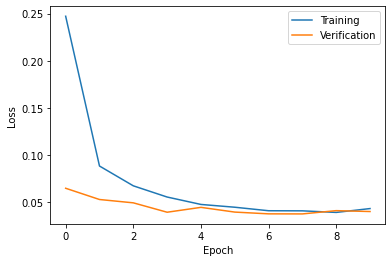

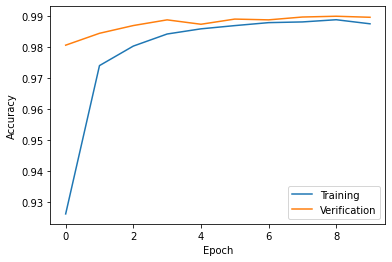

In [ ]:
#[6] 학습 및 성능 분석
def main():
    batch_size = 128
    epochs = 10

    data = DATA()
    model = CNN(data.input_shape, data.num_classes)

    history = model.fit(data.x_train, data.y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_split=0.2)

    score = model.evaluate(data.x_test, data.y_test)
    print()
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    plot_loss(history)
    plt.show()
    plot_acc(history)
    plt.show()

if __name__ == '__main__':
    main()